In [10]:
#import sys  
#!{sys.executable} -m pip install tensorflow
#!{sys.executable} -m pip install seaborn

## TensorFlow

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. 

It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

TensorFlow makes it easy to create ML models that can run in any environment.

TensorFlow provides the underlying framework with unparalleled flexibility, scalability, and production-readiness. Keras, on the other hand, offers a friendly interface for quick experimentation and prototyping

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the MNIST dataset from Keras

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
print('Training samples:', len(X_train))
print('Test samples', len(X_test))

print('Shape of individual images: ', X_train[0].shape)

Training samples: 60000
Test samples 10000
Shape of individual images:  (28, 28)


In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

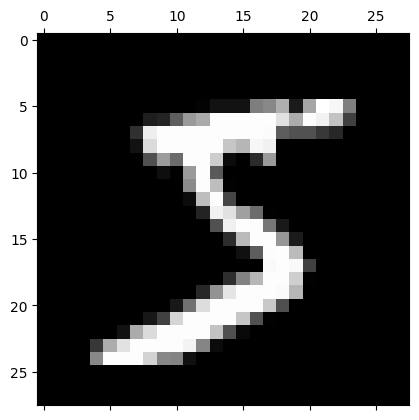

In [15]:
plt.matshow(X_train[0], cmap='gray')

In [16]:
y_train[0]

5

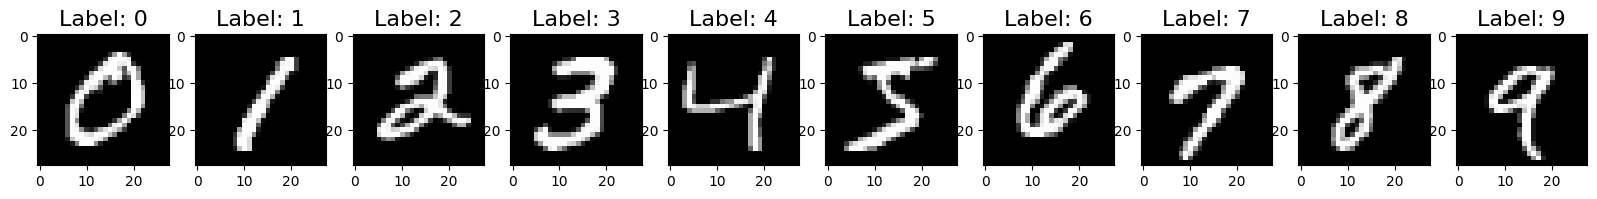

In [17]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [18]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the pixel values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjusment in the iptimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D arrays
In many machine learning models, including simple neural networks, the input data needs to be flat vector of features. By converting the 2D images matrices into 1D arrays, we transform the data into a format that neural network can work with. This is because the underlaying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [22]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28 * 28 pixels in each image) and the output layer will have 10 neurons as we want to predict a digit, 0-9

Add a hidden layer to our model and see if that improves the accuracy.

In [23]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='softmax')
    ]
)

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8142 - loss: 0.7193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9104 - loss: 0.3164
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9200 - loss: 0.2855
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9212 - loss: 0.2795
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9261 - loss: 0.2644
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9278 - loss: 0.2585
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9297 - loss: 0.2530
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9302 - loss: 0.2547
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9317 - loss: 0.2453
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9302 - loss: 0.2521


In [24]:
# 1. Prediction Generation:
y_predicted = model.predict(X_test_flattened)
#y_predicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
# 2. Accessing Prediction Details:
second_prediction=y_predicted[1]
second_prediction

array([1.8771469e-04, 8.8262044e-07, 9.9531698e-01, 6.9543043e-05,
       3.9527462e-15, 2.1168392e-03, 2.2745156e-03, 6.8590406e-19,
       3.3527245e-05, 1.1496350e-15], dtype=float32)

In [26]:
# 3. Finding the Predicted Class:
import numpy as np
print(np.argmax(y_predicted[1]))

2


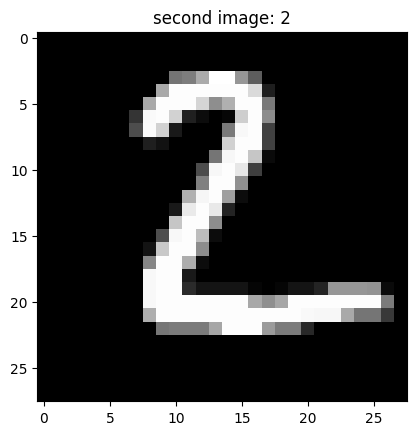

In [27]:
# 4. Visualizing Test Data:
import matplotlib.pyplot as plt

plt.imshow(X_test[1], cmap='gray')  
plt.title(f'second image: {y_test[1]}')
plt.show()

In [28]:
# 5. Comparing with Actual Labels:
actual_label_for_second_image = y_test[1]
print(f'The actual label for the second image is: {actual_label_for_second_image}')

The actual label for the second image is: 2


In [29]:
# 6. Converting Predictions to Class Labels:
#y_predicted_labels = [np.argmax(i) for i in y_predicted]

predicted_labels = [np.argmax(predict) for predict in y_predicted]
predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 3,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [30]:
# 7. Examining Initial Predictions:
five_labels = predicted_labels[:5]
five_labels

[7, 2, 1, 0, 4]

In [31]:
#Check against the first 10 labels
print(predicted_labels[:10])
print(','.join([str(c) for c in y_test[:10]]))


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7,2,1,0,4,1,4,9,5,9


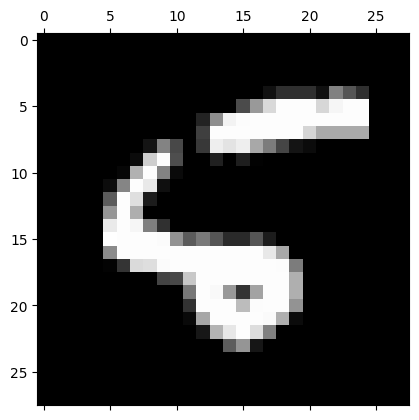

In [32]:
plt.matshow(X_test[8], cmap='gray')

reate a confusion matrix to see how well the model performed

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1114,    4,    2,    0,    1,    3,    2,    9,    0],
       [   6,    8,  928,   18,    7,    3,   10,    9,   40,    3],
       [   2,    0,   17,  934,    0,   16,    2,   10,   23,    6],
       [   1,    1,    6,    2,  925,    0,    8,    5,   11,   23],
       [   9,    2,    1,   43,   10,  763,   15,    9,   34,    6],
       [  12,    3,    8,    2,    7,    9,  913,    1,    3,    0],
       [   1,    6,   23,    7,    6,    0,    0,  959,    4,   22],
       [   6,    7,    6,   21,    9,   18,    8,   12,  881,    6],
       [  11,    7,    1,   11,   38,    6,    0,   31,    7,  897]])>

Text(95.72222222222221, 0.5, 'Truth')

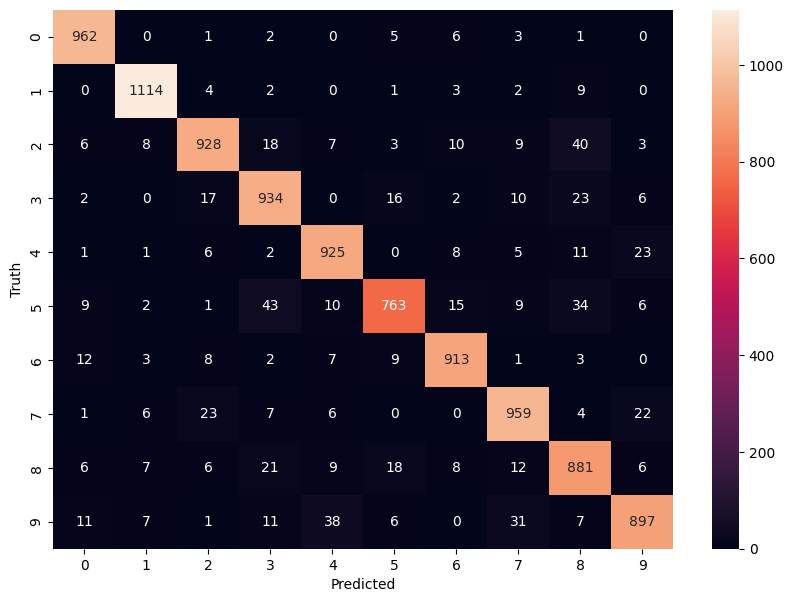

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')    #d for decimal
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [35]:
errors = (predicted_labels - y_test != 0)
errors 

array([False, False, False, ..., False, False, False])

In [36]:
y_error_indexes = [i for i, error in enumerate(errors) if error]
len(y_error_indexes) #745, 718

724

Check a few random predictions

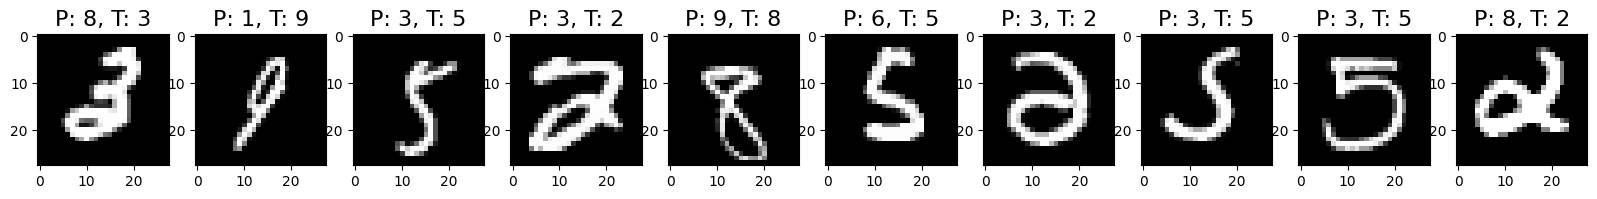

In [37]:
import random

idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes) - 1)] for _ in range(10)]

num_classes = 10

_, ax = plt.subplots(1, num_classes, figsize=(20,20)) # Create a figure and set of subplots with 'num_classes' number of columns, each subplots size is 20 x 20

for i, idx in enumerate(idx_to_check):      # Iterate through the list 'idx_to_check' with index and values.
    sample = X_test[idx]                    # Extract the test sample corresponding to the current index.
    predicted_value = predicted_labels[idx] # Retrives the predicted the value for the current test.
    true_value = y_test[idx]                # Retrives the true value from the current test.
    ax[i].imshow(sample, cmap='gray')       # Display the test samplein the i-th subplots with a grayscale colormap.
    ax[i].set_title(f'P: {predicted_value}, T: {true_value}', fontsize=16) # Set the title for the i-th subplots with predicted value and true value, with a font size of 16



In [38]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10,  activation='softmax')
    ]
)

model2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

model2.fit(X_train_flattened, y_train, epochs=10)

c:\Users\mpriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8867 - loss: 0.3965
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1066
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9789 - loss: 0.0713
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0455
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9899 - loss: 0.0329
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0252
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0206
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0160
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0116
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0103


In [39]:
y_predicted2 = model2.predict(X_test_flattened)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]


In [41]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    0,    0,    1,    1,    4,    1,    2,    0],
       [   0, 1127,    2,    1,    0,    0,    2,    1,    2,    0],
       [   3,    2, 1005,    6,    2,    0,    1,    7,    5,    1],
       [   0,    0,    2,  994,    0,    3,    0,    5,    1,    5],
       [   1,    2,    3,    1,  959,    0,    3,    3,    2,    8],
       [   2,    0,    0,   13,    1,  868,    3,    1,    3,    1],
       [   5,    2,    2,    1,    3,    1,  941,    0,    3,    0],
       [   0,    6,    9,    0,    2,    0,    0, 1002,    1,    8],
       [   2,    1,    2,    8,    2,    2,    2,    4,  947,    4],
       [   1,    3,    0,    5,    6,    3,    0,    5,    1,  985]])>

Text(95.72222222222221, 0.5, 'Truth')

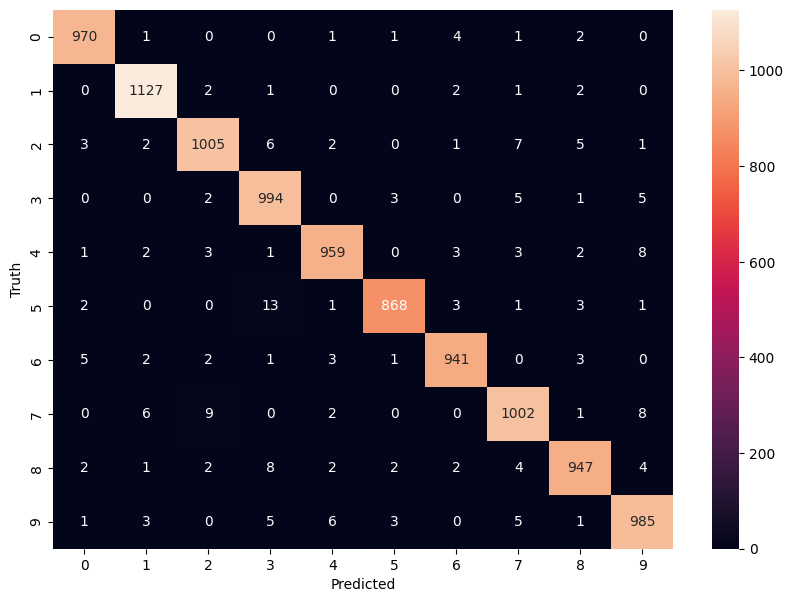

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')    #d for decimal
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
errors2 = (y_predicted_labels2 - y_test != 0)
y_error_indexes2 = [i for i, error in enumerate(errors2) if error]
len(y_error_indexes2) #745, 718, 181, 197

202

In [121]:
model3 = keras.Sequential(
    [
        keras.layers.Dense(400, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(200, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10,  activation='softmax')
    ]
)
model3.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

model3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8432 - loss: 0.5350
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9540 - loss: 0.1521
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9713 - loss: 0.0932
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9802 - loss: 0.0639
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9855 - loss: 0.0451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9892 - loss: 0.0337
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9924 - loss: 0.0244
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9934 - loss: 0.0207
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9958 - loss: 0.0137
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9955 - loss: 0.0135


In [122]:
y_predicted3 = model3.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [123]:
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]

In [124]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3)
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    0,    1,    6,    0,    2,    1],
       [   0, 1129,    0,    0,    0,    1,    4,    0,    1,    0],
       [   4,    8,  992,    6,    2,    2,    5,    7,    5,    1],
       [   0,    0,    2,  997,    0,    2,    0,    3,    3,    3],
       [   1,    1,    0,    1,  967,    0,    5,    3,    0,    4],
       [   2,    0,    0,    8,    1,  873,    4,    1,    1,    2],
       [   2,    1,    0,    1,    1,    3,  949,    0,    1,    0],
       [   1,    6,    4,    1,    0,    0,    0, 1007,    1,    8],
       [   5,    0,    1,    4,    1,    6,    4,    3,  944,    6],
       [   0,    3,    0,    3,    9,    6,    1,    5,    0,  982]])>

In [125]:
errors3 = (y_predicted_labels3 - y_test != 0)
y_error_indexes3 = [i for i, error in enumerate(errors3) if error]
len(y_error_indexes3)

192